In [56]:
import pandas as pd
import seaborn as sns
import numpy as np

from pymongo import MongoClient

client = MongoClient('localhost', 27017)

db = client['twitter']

colecciones = db.list_collection_names () #asi obtenemos el listado de colecciones en la bd
print("Total de colecciones:", len(colecciones))

i = 0
lista_cuenta = [] #listado con los counts de todas las colecciones
lista_temas = [] #listado con los temas de las colecciones
lista_df = [] #lista de dataframes

#Recorremos todas las colecciones
while i < len(colecciones):
    coleccion = db[colecciones[i]]
    
    #Recordemos que en el 1er documento de la colección colocamos el nombre del tema a propósito
    fila_tema = coleccion.find_one({"tema" : {"$exists": "true"}}, {"_id": 0})
    
    #asi obtenemos el tamaño SIN pasarlo a un dataframe, restamos 1, porque el 1er documento NO cuenta por ser el tema
    lista_cuenta.append(coleccion.estimated_document_count()-1)
    
    #La instruccion find_one de fila_tema devuelve un documento, pero nosotros queremos SOLO el valor del tema
    lista_temas.append(fila_tema["tema"])
    print("Nombre coleccion:", colecciones[i], ", Tema:", lista_temas[i], ", Tamaño:", lista_cuenta[i])
    
    #cargamos el dataframe por cada tema, quitamos SIEMPRE el primer documento, qué es donde está el tema. 
    #El resto no tienen ese campo
    df = pd.DataFrame(list(coleccion.find({"tema" : {"$exists": "false"}})))
    lista_df.append(df)                       
    i += 1

print("Total de dataframes cargados:", len(lista_df))

Total de colecciones: 10
Nombre coleccion: TrendingTopics1 , Tema: #BlackFridayChollometroTotal , Tamaño: 22
Nombre coleccion: GoogleTrends3 , Tema: elecciones eeuu , Tamaño: 11
Nombre coleccion: GoogleTrends4 , Tema: ley celaa , Tamaño: 2
Nombre coleccion: GoogleTrends5 , Tema: elecciones usa , Tamaño: 5
Nombre coleccion: TrendingTopics5 , Tema: Bad Bunny , Tamaño: 829
Nombre coleccion: GoogleTrends2 , Tema: elecciones estados unidos 2020 , Tamaño: 17
Nombre coleccion: TrendingTopics4 , Tema: #TheMandalorian , Tamaño: 38
Nombre coleccion: TrendingTopics3 , Tema: #tarugo20 , Tamaño: 17
Nombre coleccion: TrendingTopics2 , Tema: #LoQueDaMiedo , Tamaño: 7
Nombre coleccion: GoogleTrends1 , Tema: elecciones estados unidos , Tamaño: 12
Total de dataframes cargados: 10


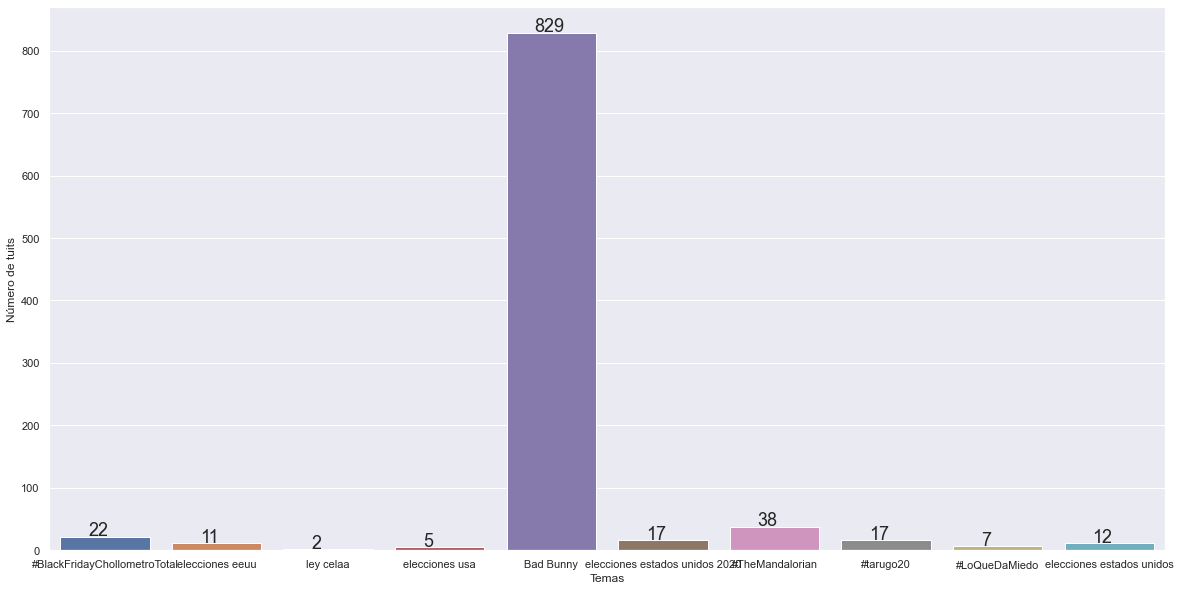

In [57]:
sns.set(rc={'figure.figsize':(20,10)})
plt = sns.barplot(x = lista_temas, y = lista_cuenta)
plt.set(xlabel = "Temas", ylabel = "Número de tuits")

for index,data in enumerate(lista_cuenta):
    plt.text(x=index-0.15 , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=18))